# Problem Statement

* This project understands how the student's performance (test score) is affected by the other variables such as Gender, Ethnicity, Parental level of education, Luch and Test prepration course.

# Data Collection

* The data consists of 8 column and 1000 rows.

### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Import the CSV Data as pandas DataFrame

In [3]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


 ### Shape of the dataset

In [5]:
df.shape

(1000, 8)

# Data Checks to perform
* Check Missing values
* Check Duplicates
* Check data types
* Check the number of unique values of each column
* Check statistics of dataset
* Check various categories present in the different categorical column


### Check Missing values

In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Check duplicate values

In [8]:
df.duplicated().sum()

0

There are no duplicate values in the data set

### Check data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Check the number of unique values in each column

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Check statistics of dataset

In [14]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insight**

* The means of all the numerical data range from 66 to 69.1
* The standard deviations for all the numerical data range from 14.6 to 15.19
* The minimum score for maths is 0, while the minimum scores for reading and writing are 17 and 15, respectively.

## Exploring Data

In [16]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [31]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(include=['number']).columns.tolist()
cateogrical_features = df.select_dtypes(include=['object']).columns.tolist()

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} cateogrical features: {}'.format(len(cateogrical_features), cateogrical_features))

We have 3 numerical features: ['math score', 'reading score', 'writing score']
We have 5 cateogrical features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [18]:
# Categories in each column

print("Categories in 'gender' column:  ", end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' column:  ", end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' column:  ", end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' column:  ", end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' column:  ", end=" ")
print(df['test preparation course'].unique())

Categories in 'gender' column:   ['female' 'male']
Categories in 'race/ethnicity' column:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' column:   ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' column:   ['standard' 'free/reduced']
Categories in 'test preparation course' column:   ['none' 'completed']


### Adding columns for "Total Score" and "Average"

In [32]:
df["total score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average score"] = df['total score'] / 3

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [51]:
# Count of students with full marks

reading_full = len(df[df['reading score'] == 100])
writing_full = len(df[df['writing score'] == 100])
maths_full = len(df[df['math score'] == 100])

print(f"Number of students with full marks in reading: {reading_full}")
print(f"Number of students with full marks in writing: {writing_full}")
print(f"Number of students with full marks in maths: {maths_full}")

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in maths: 7


In [54]:
# Count of students who got less than 35 marks

reading_less_35 = len(df[df['reading score'] <  35])
writing_less_35 = len(df[df['writing score'] < 35])
maths_less_35 = len(df[df['math score'] < 35])


print(f"Number of students with less than 35 marks in reading: {reading_less_35}")
print(f"Number of students with less than 35 marks in writing: {writing_less_35}")
print(f"Number of students with less than 35 marks in maths: {maths_less_35}")

Number of students with less than 35 marks in reading: 15
Number of students with less than 35 marks in writing: 17
Number of students with less than 35 marks in maths: 22


**Insight**

* From above values we get students have failed in test
* Best performance in reading section
* Most students failed in maths test

## Exploring Data (Visualization)

### Visualize average score distribution to amek some conclusion.

* Histogram
* Kernel Distribution Function (KDE)

### Histogram & KDE

<Axes: xlabel='average score', ylabel='Count'>

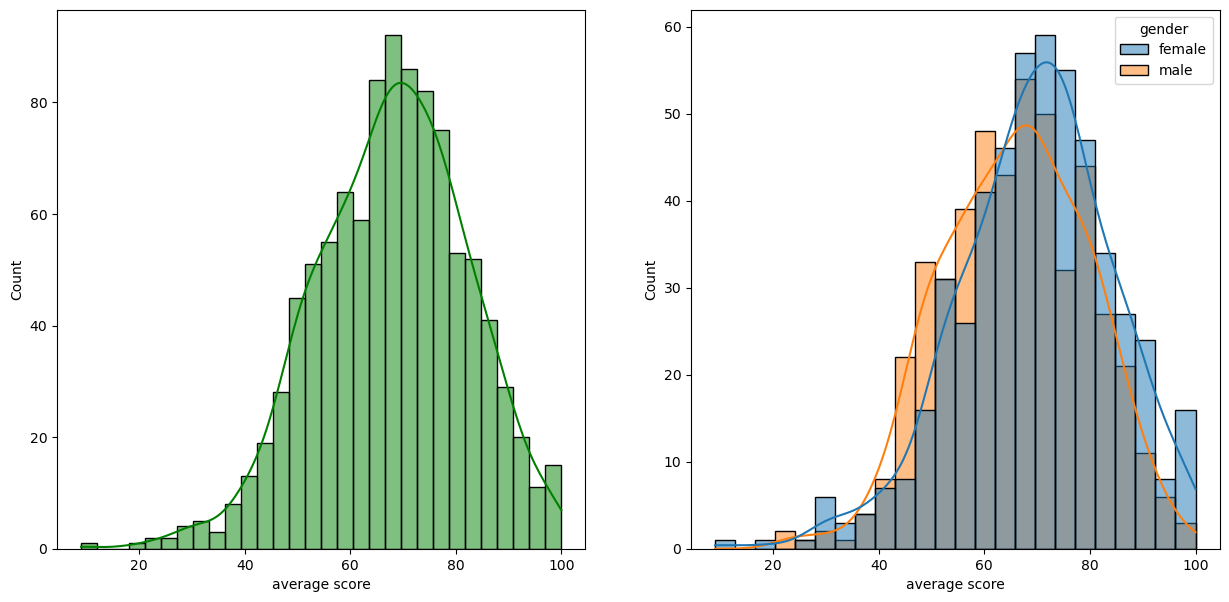

In [67]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='average score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average score', kde=True, hue='gender')

<Axes: xlabel='total score', ylabel='Count'>

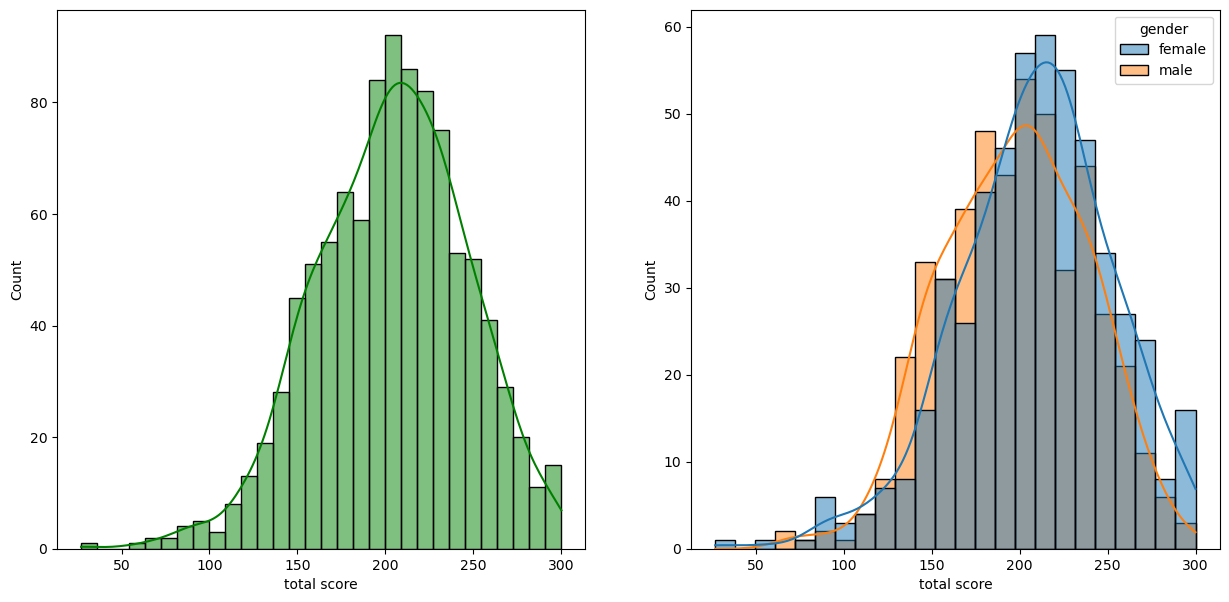

In [70]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')